In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# 데이터 시각화 패키지
import seaborn as sns

# from sklearn.preprocessing import StandardScaler

In [2]:
# 환경 설정 
matplotlib.rc("font", family = "NanumGothicCoding")
plt.rc('font', family = "NanumGothicCoding")
matplotlib.rc('axes', unicode_minus = False)

In [3]:
df = pd.read_csv("result.csv", encoding = 'euc-kr')
df

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,부서명,협력사ID,협력사명,브랜드ID,브랜드명,대분류,중분류,소분류,세분류,카테고리
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,생활2팀,104532,(주)턱케이앤코,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,식품4팀,100002,산협경제지주㈜,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,식품4팀,100002,산협경제지주㈜,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,식품1팀,104640,(주)하일에프앤씨,36520,이상용크레마롤,식품,가공식품,빵/떡/과자류,빵/쨈,가공농산
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,식품3팀,100004,물산업협동조합중앙회,27468,자숙문어슬라이스,식품,수산물,일반어류,문어,신선수산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,TV,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,생활1팀,100716,(주)라이온그룹코리아,42184,제우스커브드TV2019,가전,영상가전,TV,스마트 TV,가전
26279,TV,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,생활1팀,100716,(주)라이온그룹코리아,42184,제우스커브드TV2019,가전,영상가전,TV,스마트 TV,가전
26280,TV,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,생활1팀,100716,(주)라이온그룹코리아,42174,제우스TV2019,가전,영상가전,TV,스마트 TV,가전
26281,TV,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,식품1팀,100955,주식회사행복을파는사람들,44834,이경제흑염소진액,식품,건강식품,전통건강식품,건강즙류,건강식품


In [4]:
from datetime import datetime

df["start hour"] = 0
df["end hour"] = 0
df["weekday"] = 0

for i in range(len(df)):
  df.loc[i, 'start hour'] = str(df.loc[i, '방송시작시간']).split('T')[1].split(":")[0]
  df.loc[i, 'end hour'] = str(df.loc[i, '방송종료시간']).split('T')[1].split(":")[0]
  date = str(df.loc[i, '방송시작시간']).split("T")[0]
  datetime_date = datetime.strptime(date, '%Y-%m-%d')
  df.loc[i, 'weekday'] = datetime_date.weekday()

df.head()

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,브랜드ID,브랜드명,대분류,중분류,소분류,세분류,카테고리,start hour,end hour,weekday
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,00,01,4
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,4
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,4
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,36520,이상용크레마롤,식품,가공식품,빵/떡/과자류,빵/쨈,가공농산,02,03,4
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,27468,자숙문어슬라이스,식품,수산물,일반어류,문어,신선수산,03,04,4


In [5]:
df["총판매매출"] = 0
profit = df["상품주문금액"] * df["수수료율"] 
df["총판매매출"] = profit.round(2)

df.head()

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,브랜드명,대분류,중분류,소분류,세분류,카테고리,start hour,end hour,weekday,총판매매출
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,00,01,4,2.157112e+09
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,4,8.376965e+08
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,4,0.000000e+00
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,이상용크레마롤,식품,가공식품,빵/떡/과자류,빵/쨈,가공농산,02,03,4,4.766599e+08
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,자숙문어슬라이스,식품,수산물,일반어류,문어,신선수산,03,04,4,1.339925e+08


In [6]:
df.fillna('undefined',inplace=True)

<AxesSubplot:>

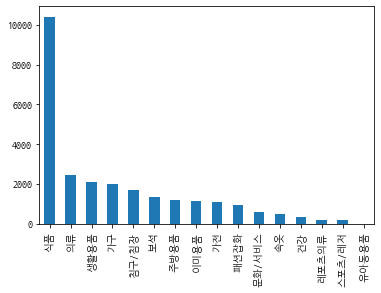

In [7]:
df_count = df["대분류"].value_counts()
df_count.plot.bar()

<AxesSubplot:>

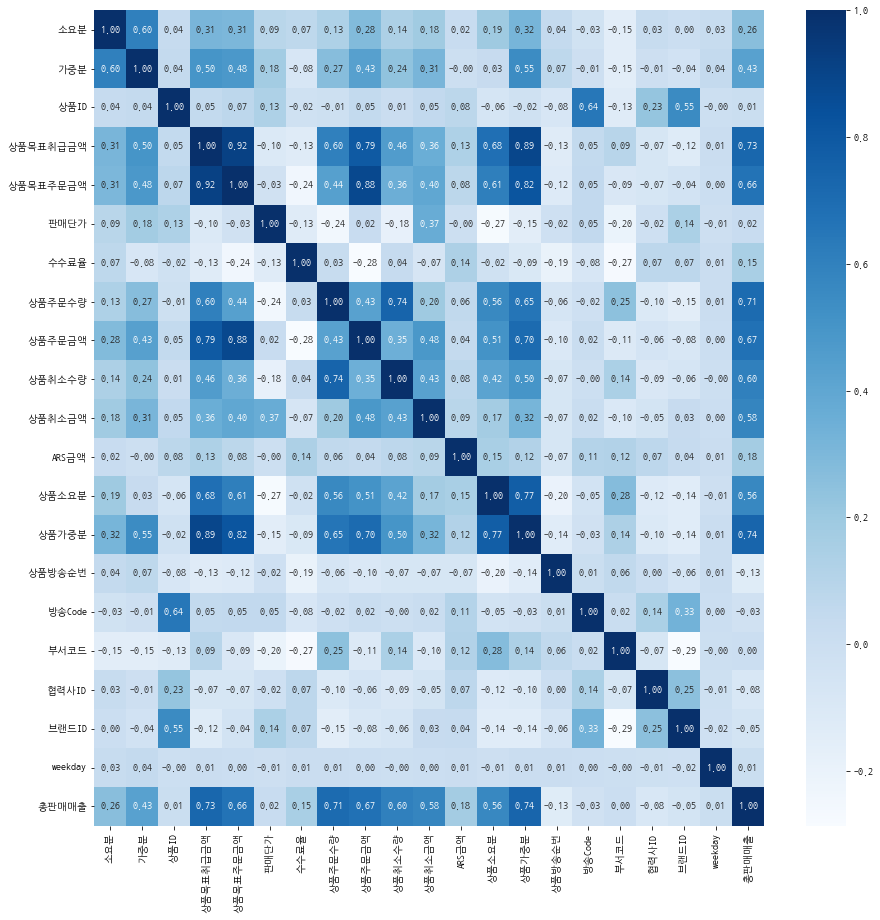

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap="Blues", annot = True, fmt = '.2f')

In [9]:
cnt =df.value_counts('대분류')
df_new = pd.DataFrame(cnt)
df_new

,0
대분류,
식품,10415
의류,2431
생활용품,2126
가구,2012
침구/침장,1696
보석,1369
주방용품,1222
이미용품,1129
가전,1117


In [10]:
df2 = df.loc[:,["대분류","start hour"]]

a = df2[df2['start hour'] == "00"].value_counts('대분류').to_frame().T
a1 = df2[df2['start hour'] == "01"].value_counts('대분류').to_frame().T
a2 = df2[df2['start hour'] == "02"].value_counts('대분류').to_frame().T
a3 = df2[df2['start hour'] == "03"].value_counts('대분류').to_frame().T
a4 = df2[df2['start hour'] == "04"].value_counts('대분류').to_frame().T
a5 = df2[df2['start hour'] == "05"].value_counts('대분류').to_frame().T
a6 = df2[df2['start hour'] == "06"].value_counts('대분류').to_frame().T
a7 = df2[df2['start hour'] == "07"].value_counts('대분류').to_frame().T
a8 = df2[df2['start hour'] == "08"].value_counts('대분류').to_frame().T
a9 = df2[df2['start hour'] == "09"].value_counts('대분류').to_frame().T
a10 = df2[df2['start hour'] == "10"].value_counts('대분류').to_frame().T
a11 = df2[df2['start hour'] == "11"].value_counts('대분류').to_frame().T
a12 = df2[df2['start hour'] == "12"].value_counts('대분류').to_frame().T
a13 = df2[df2['start hour'] == "13"].value_counts('대분류').to_frame().T
a14 = df2[df2['start hour'] == "14"].value_counts('대분류').to_frame().T
a15 = df2[df2['start hour'] == "15"].value_counts('대분류').to_frame().T
a16 = df2[df2['start hour'] == "16"].value_counts('대분류').to_frame().T
a17 = df2[df2['start hour'] == "17"].value_counts('대분류').to_frame().T
a18 = df2[df2['start hour'] == "18"].value_counts('대분류').to_frame().T
a19 = df2[df2['start hour'] == "19"].value_counts('대분류').to_frame().T
a20 = df2[df2['start hour'] == "20"].value_counts('대분류').to_frame().T
a21 = df2[df2['start hour'] == "21"].value_counts('대분류').to_frame().T
a22 = df2[df2['start hour'] == "22"].value_counts('대분류').to_frame().T
a23 = df2[df2['start hour'] == "23"].value_counts('대분류').to_frame().T

In [11]:
df_f = pd.concat([a, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23])

In [12]:
df_f['time'] = ['00','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15','16','17','18','19','20','21','22','23']

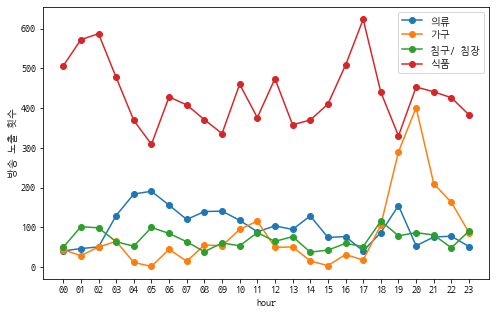

In [13]:
## 시간대별 -> 방송 노출 횟수

plt.figure(figsize=[8,5])
plt.plot(df_f['time'],df_f['의류'], label='의류',marker='o')
plt.plot(df_f['time'],df_f['가구'], label='가구',marker='o')
plt.plot(df_f['time'],df_f['침구/침장'], label='침구/ 침장',marker='o')
plt.plot(df_f['time'],df_f['식품'], label='식품',marker='o')

plt.xlabel('hour')
plt.ylabel('방송 노출 횟수')

plt.legend()



<AxesSubplot:xlabel='start hour', ylabel='상품주문수량'>

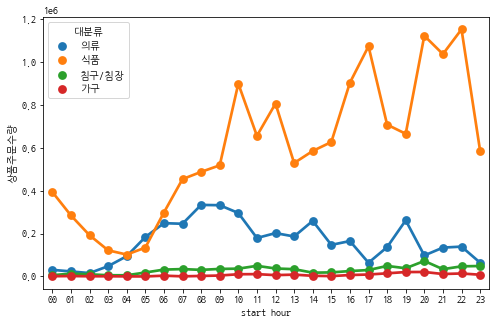

In [14]:
#시간대 별 -> 상품 주문 수량 
cond1 = ((df['대분류']=='식품') | (df['대분류']=='가구') |(df['대분류']=='의류')|(df['대분류']=='침구/침장') ) 

plt.figure(figsize=[8,5])
sns.pointplot(data=df.loc[cond1], x= df["start hour"] ,y='상품주문수량',hue='대분류',ci=None, estimator=sum)

## 통계적 검정 : Wilcoxon rank sum test

In [30]:
# df_w = pd.DataFrame(df['weekday'])
# df_w

df_w2 = df[(df["weekday"] == 3) | (df["weekday"] == 4)].loc[:,["가중분"]]
df_w4 = df[(df['weekday'] == 0) | (df['weekday'] == 1) | (df['weekday'] == 2 )  | (df['weekday'] == 5) |(df['weekday'] == 6)].loc[:,["가중분"]]


In [31]:
df_w2.reset_index(drop = True, inplace = True)

In [32]:
df_w4.reset_index
df_w4 = df_w4.iloc[:7625]
df_w4.reset_index(drop = True, inplace = True)
df_w4

,가중분
0,34.0
1,34.0
2,34.0
3,34.0
4,21.6
...,...
7620,50.3
7621,59.5
7622,59.5
7623,59.5


In [33]:
df_w4.rename(columns = {'가중분':'가중분1'}, inplace = True)

In [34]:
# 통계 분석 패키지 
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from scipy.stats import ranksums

In [36]:
# 비교하기 위한 df_f
df_f = pd.concat([df_w2,df_w4], axis = 1)
df_f

,가중분,가중분1
0,52.7,34.0
1,38.1,34.0
2,38.1,34.0
3,19.7,34.0
4,16.1,21.6
...,...,...
7620,109.6,50.3
7621,82.4,59.5
7622,104.0,59.5
7623,104.0,59.5


In [37]:
statistic, p = stats, shapiro(df_f['가중분'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic, p = stats, shapiro(df_f['가중분1'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = <module 'scipy.stats' from '/home/piai/anaconda3/lib/python3.9/site-packages/scipy/stats/__init__.py'>, p-value = ShapiroResult(statistic=0.9468861222267151, pvalue=0.0)
statistic = <module 'scipy.stats' from '/home/piai/anaconda3/lib/python3.9/site-packages/scipy/stats/__init__.py'>, p-value = ShapiroResult(statistic=0.9673134684562683, pvalue=2.1403854534935018e-38)


/home/piai/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [38]:
from scipy.stats import bartlett
stats.bartlett(df_f['가중분'], df_f['가중분1'])

BartlettResult(statistic=646.3727714245694, pvalue=1.3739321242703922e-142)

In [39]:
t_result = stats.ranksums(df_f['가중분'], df_f['가중분1'])
t, p = t_result.statistic.round(3), t_result.pvalue

print("2-Sample t-test")
print("t : {}".format(t))
print("p : {}".format(p))

2-Sample t-test
t : 35.702
p : 3.626993391603762e-279
